In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [16]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

In [27]:
x_valid,x_train=x_train_full[:5000]/255.0,x_train_full[5000:]/255.0
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

In [28]:
class_names=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [29]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(500,activation="relu"))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 500)               392500    
                                                                 
 dense_7 (Dense)             (None, 200)               100200    
                                                                 
 dense_8 (Dense)             (None, 10)                2010      
                                                                 
Total params: 494,710
Trainable params: 494,710
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [44]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2114 - accuracy: 0.9238 - val_loss: 0.2943 - val_accuracy: 0.8920
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2070 - accuracy: 0.9260 - val_loss: 0.3001 - val_accuracy: 0.8918
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2037 - accuracy: 0.9276 - val_loss: 0.2904 - val_accuracy: 0.8956
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1990 - accuracy: 0.9300 - val_loss: 0.3009 - val_accuracy: 0.8906
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1952 - accuracy: 0.9305 - val_loss: 0.2868 - val_accuracy: 0.8944
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1925 - accuracy: 0.9314 - val_loss: 0.2979 - val_accuracy: 0.8934
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1897 - accuracy: 0.9314 - val_loss: 0.2799 - val_accuracy:

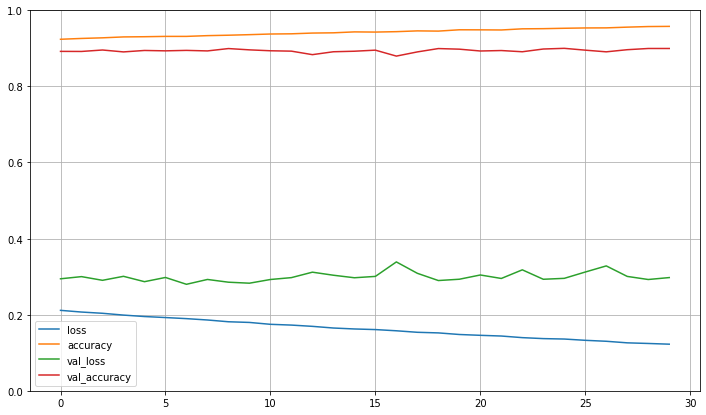

In [45]:
pd.DataFrame(history.history).plot(figsize=(12,7))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 72.4897 - accuracy: 0.8622


[72.48971557617188, 0.8622000217437744]

In [38]:
x_new=x_test[:3]
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
y_pred=y_proba.argmax(axis=-1)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')